# ¿Cuantas interaciones? <br>    
*El objetivo es conocer la iteración óptima.* 

In [90]:
import torch as pt

Creando el Dataset:

In [91]:
from torch.utils.data import Dataset

In [92]:
class Data(Dataset):
    def __init__(self,train= True):
        self.x=pt.arange(-5,5,0.1).view(-1,1)
        self.y=-6*self.x + 10+ 0.65*pt.randn(self.x.size())
        self.len= self.x.shape[0]
        if train == True:
            self.y[0:20]= self.y[0:20]+30
            self.y[80:100]= self.y[80:100]-40
        
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

In [93]:
train_data=Data()
val_data= Data(train=False)

Observando las funciones:

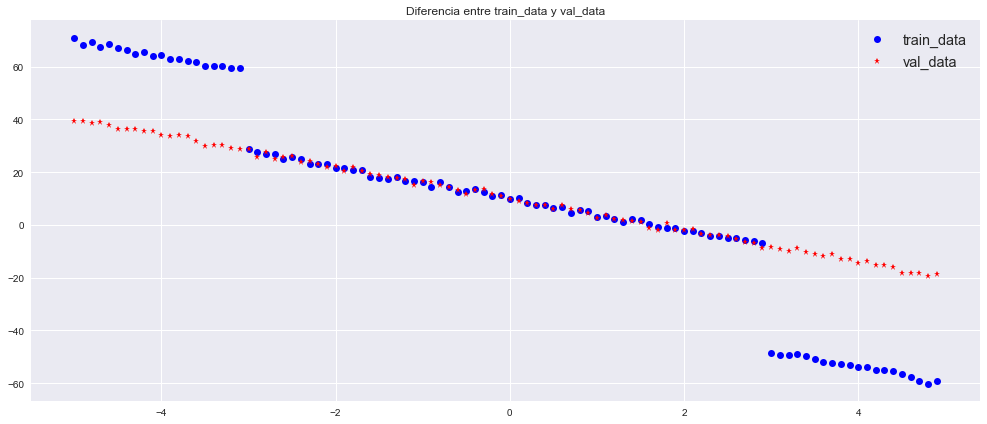

In [94]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize= (17,7))
ax.plot(train_data.x.numpy(),train_data.y.numpy(),'bo', color= 'blue', label='train_data')
ax.plot(val_data.x.numpy(),val_data.y.numpy(),'*',color= 'red',label='val_data')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.title('Diferencia entre train_data y val_data')
legend.get_frame().set_facecolor('cyan')
plt.show()

In [18]:
import torch.nn as nn

In [95]:
class LR(nn.Module):
    def __init__(self,in_size,out_size):
        super(LR,self).__init__()
        self.linear=nn.Linear(in_size,out_size)
        
    def forward(self,x):
        out= self.linear(x)
        return out    

Definiendo la **función objetivo** como la media cuadrática: $$ \Large g(y^*,y)= \frac{1}{N}\sum_{n=1}^N (y^*-y)^2 $$

In [96]:
def criterion(yhat,y):
    return pt.mean((yhat-y)**2)

In [97]:
from torch.utils.data import DataLoader
trainloader= DataLoader(dataset=train_data,batch_size=1)

- Defininendo `model` e indicando que el input y el output son unidimensionales 
- Añadiendo el modelo a la función `optim.SDG` con lr=0.01 <br>
- Ejecutando el programa:

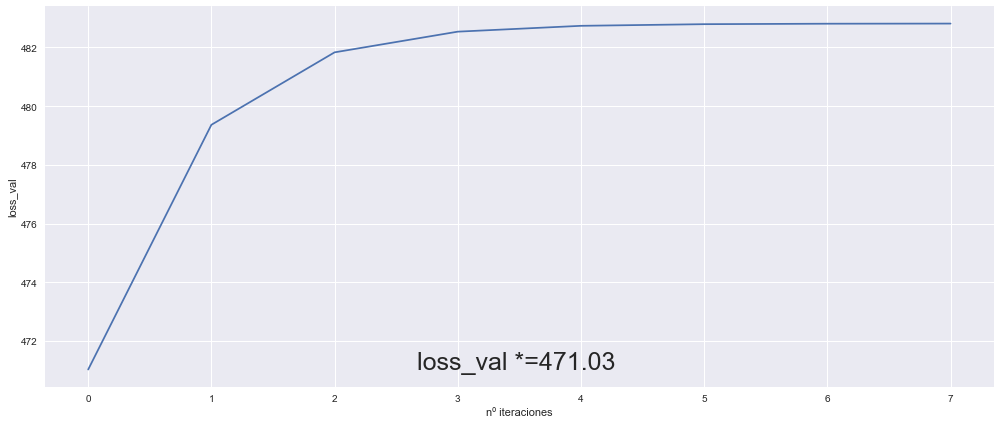

In [126]:
model = LR(1,1)
optimizer=pt.optim.SGD(model.parameters(),lr=0.01)
n=8
LOSS_VALs=[]
min_loss=pow(10,7)
for epoch in range(n):
    for x,y in trainloader:
        yhat= model(x)
        loss= criterion(yhat,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    test= model(val_data.x)
    loss_val= float(criterion(test,val_data.y))
    LOSS_VALs.append(loss_val)
    if loss_val < min_loss:
        min_loss = loss_val
        MODELO = model
#GRAFICANDO:
plt.figure(figsize= (17,7))    
plt.plot(range(n),LOSS_VALs)
plt.text(n/3,min(LOSS_VALs),'loss_val *={0}'.format(round(min(LOSS_VALs),2)),fontsize=25)
plt.xlabel('nº iteraciones')
plt.ylabel('loss_val')
plt.show()

Aplicando el modelo óptimo:

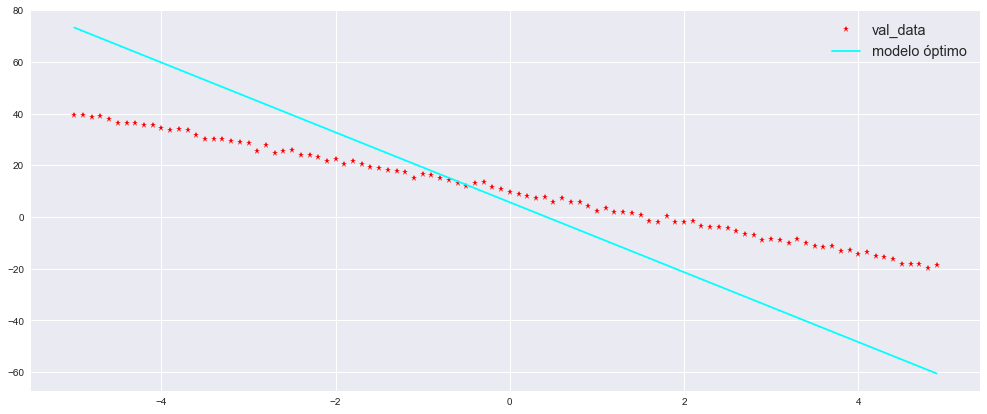

In [130]:
yhat = MODELO(val_data.x)
plt.figure(figsize=(17,7))
plt.plot(val_data.x.numpy(),val_data.y.numpy(),'*',color='red',label= 'val_data')
plt.plot(val_data.x.numpy(),yhat.detach().numpy(),color= 'cyan',label= 'modelo óptimo')
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()

* No se puede generalizar que la iteración óptima es la inicial
* También depende de las características del `test_data`
* No se puede generar ni el número de iteraciones que se deben realizar